In [13]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import BinaryAccuracy
#ROOT_DIR = os.path.dirname(os.path.abspath(__file__))
# Ottieni il percorso della cartella corrente del notebook
current_folder = os.getcwd()
# Trova il percorso della cartella root risalendo la gerarchia delle cartelle
root_folder = current_folder
while 'Project' not in os.listdir(root_folder):
    root_folder = os.path.dirname(root_folder)
# Visualizza il percorso della cartella root
print("Percorso della cartella root:", root_folder)

Percorso della cartella root: /home/af/a22/ML


# Input encoder for monk's and 1-hot-encoder

In [14]:
# normalize the matrix (n.b.: the first column is the label)
# standardize data: ensure that the items will have a defined interval between dateset columns 
def monkScaled(matr):

    scaled_list = []
    # iter on columns 
    for i in range(1, 7):
        # extract the i-th column
        column = matr[:, i]
        
        # linear interpolation so that each value of a column is linearly distributed between 0 to the number of unique values (-1) in that column
        matr[:, i] = np.interp(column, (column.min(), column.max()), (0, len(np.unique(column)) - 1))

        # want the minimum number of bits when 1-hot-encode data
        col_categorical = to_categorical(matr[:, i])

        # define a numpy matrix
        if i != 1:
                scaled_list = np.concatenate((scaled_list, col_categorical), axis=1) #concatenate arrays along the 1 axes
        else: 
            scaled_list = col_categorical #return the array
        
    # input encoding for monk's problems    
    return scaled_list 


def oneHotEncoded(monk_number):

    train_file = "./ds/monks-{}.train".format(monk_number)
    test_file = "./ds/monks-{}.test".format(monk_number)

    # range up to 8 because there's a first blank space to be skipped
    train = np.loadtxt(train_file, delimiter=' ', usecols=range(1, 8))
    test = np.loadtxt(test_file, delimiter=' ', usecols=range(1, 8))

    # get target values
    y = train[:, 0]
    y_test = test[:, 0]

    # scale other values per column between 0 and # unique values for that column
    x = monkScaled(train)
    x_test = monkScaled(test)

    return x, y, x_test, y_test

In [15]:
def monk_solver(monk_number, eta, alpha, epochs, lmb=None, batch_size=25, n_unit=4):

    # get data
    x, y, x_test, y_test = oneHotEncoded(monk_number)

    # create the model
    regularizer = l2(lmb) if lmb else None
    optimizer = SGD(learning_rate=eta, momentum=alpha)
    model = Sequential([
        Dense(n_unit, activation='tanh', kernel_regularizer=regularizer, input_dim=17),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[BinaryAccuracy(name='accuracy')])

    res = model.fit(x, y, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), verbose=2)

    # plot results for training set
    plt.plot(res.history['loss'])
    plt.plot(res.history['val_loss'])
    plt.xlabel("Epoch")
    plt.ylabel("MSE")
    plt.legend(['Loss TR', 'Loss TS'], loc='center right')
    plt.title(f'MONK {monk_number} (eta = {eta}, alpha = {alpha}, lambda = {lmb}) - Loss')
    #savePic(monk_number, eta, alpha, lmb)
    plt.show()

    # plot results for "test" (validation) set
    plt.plot(res.history['accuracy'])
    plt.plot(res.history['val_accuracy'])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(['Accuracy TR', 'Accuracy TS'], loc='center right')
    plt.title(f'MONK {monk_number} (eta = {eta}, alpha = {alpha}, lambda = {lmb}) - Accuracy')
    plt.show()


Epoch 1/200
5/5 - 0s - loss: 0.2401 - accuracy: 0.6048 - val_loss: 0.2230 - val_accuracy: 0.6389 - 320ms/epoch - 64ms/step
Epoch 2/200
5/5 - 0s - loss: 0.2132 - accuracy: 0.6855 - val_loss: 0.2120 - val_accuracy: 0.6458 - 33ms/epoch - 7ms/step
Epoch 3/200
5/5 - 0s - loss: 0.1988 - accuracy: 0.7097 - val_loss: 0.2006 - val_accuracy: 0.7176 - 33ms/epoch - 7ms/step
Epoch 4/200
5/5 - 0s - loss: 0.1749 - accuracy: 0.7903 - val_loss: 0.1965 - val_accuracy: 0.7338 - 33ms/epoch - 7ms/step
Epoch 5/200
5/5 - 0s - loss: 0.1619 - accuracy: 0.7984 - val_loss: 0.1946 - val_accuracy: 0.7245 - 35ms/epoch - 7ms/step
Epoch 6/200
5/5 - 0s - loss: 0.1558 - accuracy: 0.8226 - val_loss: 0.1988 - val_accuracy: 0.7083 - 35ms/epoch - 7ms/step
Epoch 7/200
5/5 - 0s - loss: 0.1430 - accuracy: 0.8468 - val_loss: 0.1886 - val_accuracy: 0.7361 - 34ms/epoch - 7ms/step
Epoch 8/200
5/5 - 0s - loss: 0.1429 - accuracy: 0.8306 - val_loss: 0.1863 - val_accuracy: 0.7569 - 34ms/epoch - 7ms/step
Epoch 9/200
5/5 - 0s - loss: 0

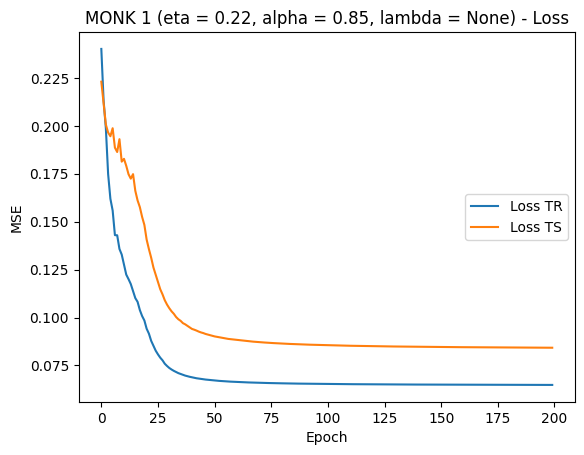

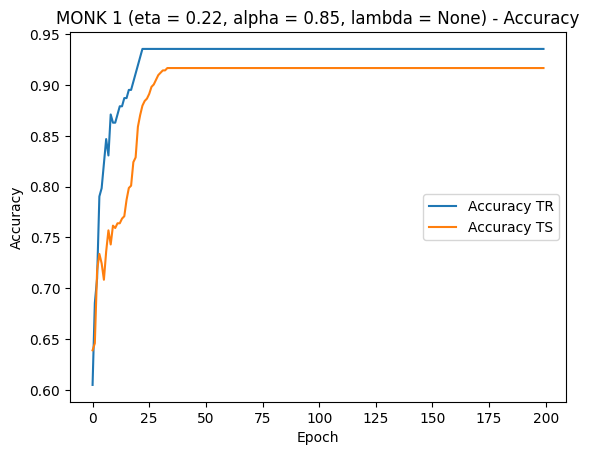

Epoch 1/100
7/7 - 0s - loss: 0.2379 - accuracy: 0.6272 - val_loss: 0.2212 - val_accuracy: 0.6528 - 295ms/epoch - 42ms/step
Epoch 2/100
7/7 - 0s - loss: 0.2387 - accuracy: 0.5799 - val_loss: 0.2225 - val_accuracy: 0.6898 - 35ms/epoch - 5ms/step
Epoch 3/100
7/7 - 0s - loss: 0.2317 - accuracy: 0.6509 - val_loss: 0.2189 - val_accuracy: 0.6644 - 38ms/epoch - 5ms/step
Epoch 4/100
7/7 - 0s - loss: 0.2221 - accuracy: 0.6746 - val_loss: 0.2259 - val_accuracy: 0.6806 - 35ms/epoch - 5ms/step
Epoch 5/100
7/7 - 0s - loss: 0.2241 - accuracy: 0.6391 - val_loss: 0.2238 - val_accuracy: 0.6644 - 35ms/epoch - 5ms/step
Epoch 6/100
7/7 - 0s - loss: 0.2177 - accuracy: 0.6923 - val_loss: 0.2178 - val_accuracy: 0.6713 - 34ms/epoch - 5ms/step
Epoch 7/100
7/7 - 0s - loss: 0.2154 - accuracy: 0.6923 - val_loss: 0.2206 - val_accuracy: 0.6551 - 33ms/epoch - 5ms/step
Epoch 8/100
7/7 - 0s - loss: 0.2122 - accuracy: 0.6805 - val_loss: 0.2182 - val_accuracy: 0.6597 - 37ms/epoch - 5ms/step
Epoch 9/100
7/7 - 0s - loss: 0

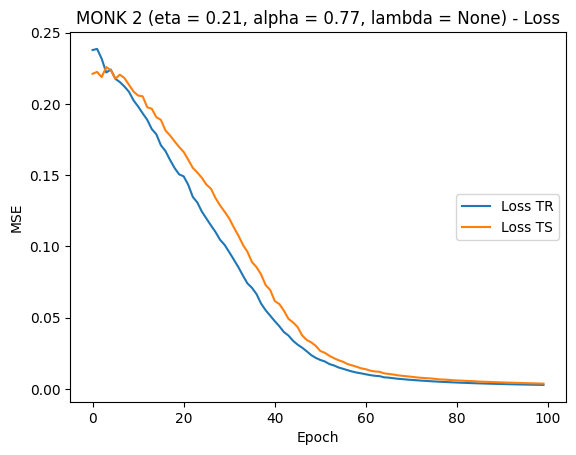

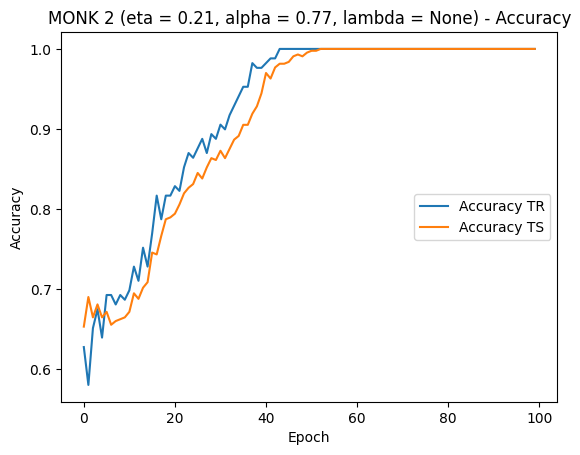

Epoch 1/120
5/5 - 0s - loss: 0.2864 - accuracy: 0.4590 - val_loss: 0.2701 - val_accuracy: 0.4606 - 299ms/epoch - 60ms/step
Epoch 2/120
5/5 - 0s - loss: 0.2588 - accuracy: 0.5246 - val_loss: 0.2418 - val_accuracy: 0.5972 - 34ms/epoch - 7ms/step
Epoch 3/120
5/5 - 0s - loss: 0.2365 - accuracy: 0.6311 - val_loss: 0.2211 - val_accuracy: 0.6944 - 33ms/epoch - 7ms/step
Epoch 4/120
5/5 - 0s - loss: 0.2210 - accuracy: 0.7049 - val_loss: 0.1989 - val_accuracy: 0.7708 - 35ms/epoch - 7ms/step
Epoch 5/120
5/5 - 0s - loss: 0.1962 - accuracy: 0.7459 - val_loss: 0.1715 - val_accuracy: 0.8310 - 33ms/epoch - 7ms/step
Epoch 6/120
5/5 - 0s - loss: 0.1696 - accuracy: 0.8197 - val_loss: 0.1412 - val_accuracy: 0.9074 - 33ms/epoch - 7ms/step
Epoch 7/120
5/5 - 0s - loss: 0.1421 - accuracy: 0.8770 - val_loss: 0.1132 - val_accuracy: 0.9722 - 32ms/epoch - 6ms/step
Epoch 8/120
5/5 - 0s - loss: 0.1174 - accuracy: 0.9262 - val_loss: 0.0869 - val_accuracy: 0.9722 - 32ms/epoch - 6ms/step
Epoch 9/120
5/5 - 0s - loss: 0

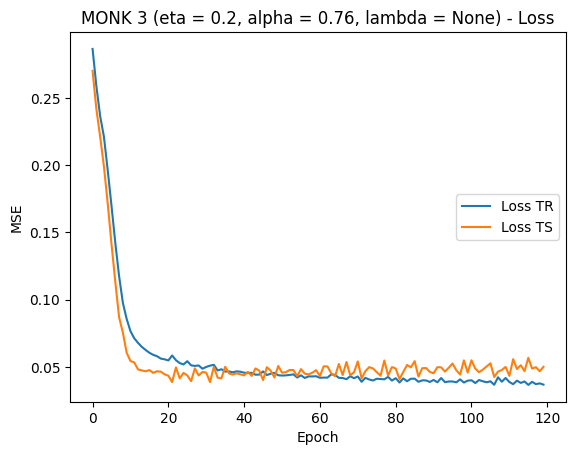

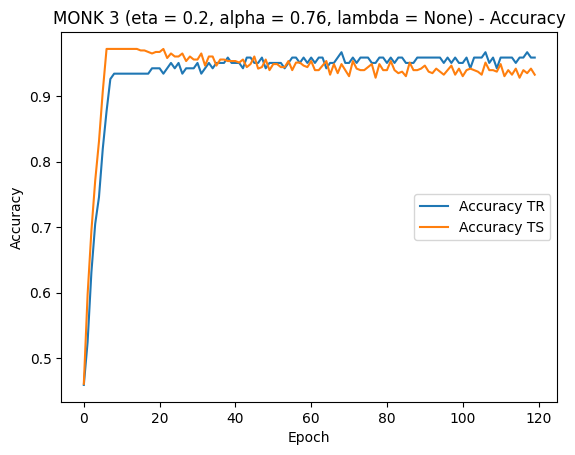

Epoch 1/200
5/5 - 0s - loss: 0.2738 - accuracy: 0.4344 - val_loss: 0.2436 - val_accuracy: 0.5532 - 311ms/epoch - 62ms/step
Epoch 2/200
5/5 - 0s - loss: 0.2371 - accuracy: 0.5656 - val_loss: 0.2086 - val_accuracy: 0.7500 - 33ms/epoch - 7ms/step
Epoch 3/200
5/5 - 0s - loss: 0.2052 - accuracy: 0.7131 - val_loss: 0.1812 - val_accuracy: 0.8102 - 35ms/epoch - 7ms/step
Epoch 4/200
5/5 - 0s - loss: 0.1768 - accuracy: 0.8361 - val_loss: 0.1546 - val_accuracy: 0.8657 - 34ms/epoch - 7ms/step
Epoch 5/200
5/5 - 0s - loss: 0.1508 - accuracy: 0.8934 - val_loss: 0.1286 - val_accuracy: 0.9213 - 35ms/epoch - 7ms/step
Epoch 6/200
5/5 - 0s - loss: 0.1269 - accuracy: 0.9016 - val_loss: 0.1048 - val_accuracy: 0.9537 - 34ms/epoch - 7ms/step
Epoch 7/200
5/5 - 0s - loss: 0.1080 - accuracy: 0.9344 - val_loss: 0.0869 - val_accuracy: 0.9722 - 34ms/epoch - 7ms/step
Epoch 8/200
5/5 - 0s - loss: 0.0930 - accuracy: 0.9344 - val_loss: 0.0737 - val_accuracy: 0.9722 - 35ms/epoch - 7ms/step
Epoch 9/200
5/5 - 0s - loss: 0

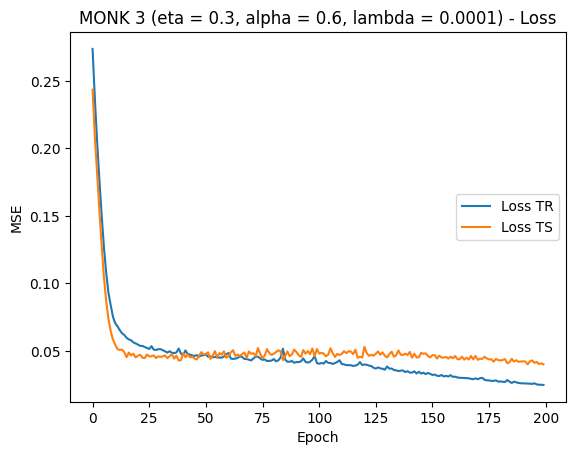

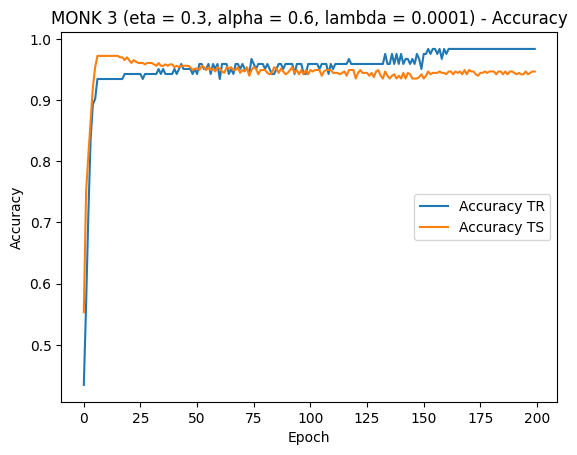

In [17]:
monk_solver(monk_number=1, eta=0.22, alpha=0.85, epochs=200)
monk_solver(monk_number=2, eta=0.21, alpha=0.77, epochs=100)
monk_solver(monk_number=3, eta=0.2, alpha=0.76, epochs=120)
monk_solver(monk_number=3, eta=0.3, alpha=0.6, lmb=0.0001, epochs=200)